In [33]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [34]:
#import data
df = pd.read_csv("data/binary_state_kickstarter_projects.csv")
df.head()

,category,subcategory,country,launched,deadline,goal,pledged,backers,state,duration,launch_month,org_state,country_encoded,category_encoded,subcategory_encoded
0,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,0,39,4,Failed,21,5,52
1,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,0,87,4,Failed,21,6,129
2,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,1,8,4,Successful,21,0,70
3,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,1,79,4,Successful,21,13,131
4,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,0,28,4,Failed,21,5,52


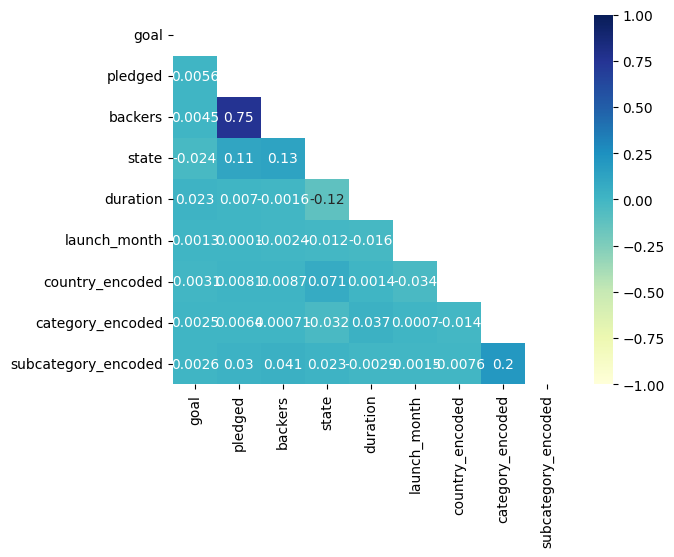

In [35]:
# Correlation heatmap 
correlations = df.corr(numeric_only=True)
mask = np.triu(correlations)
sns.heatmap(correlations , vmax=1, vmin=-1, annot=True, mask=mask, cmap="YlGnBu");

## As simple as it gets. No encoding or logarithmic

Accuracy: 0.63
Recall: 0.63
--------------------------------------------------


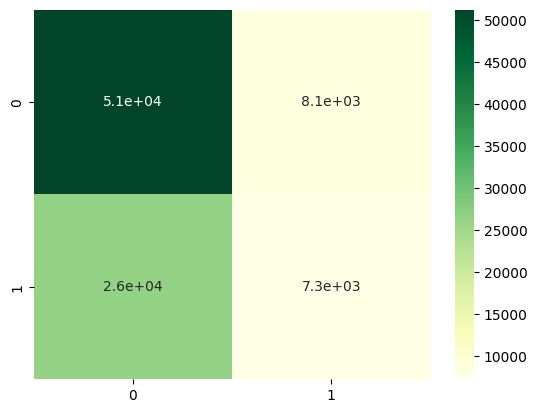

In [36]:
#defining target and other variables
X = df[['duration']]
y = df['state']

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Train model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", recall_score(y_test, y_pred, average='weighted').round(2))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

## Using Categorical Variables Country and Category

Accuracy: 0.58
Recall: 0.58
--------------------------------------------------


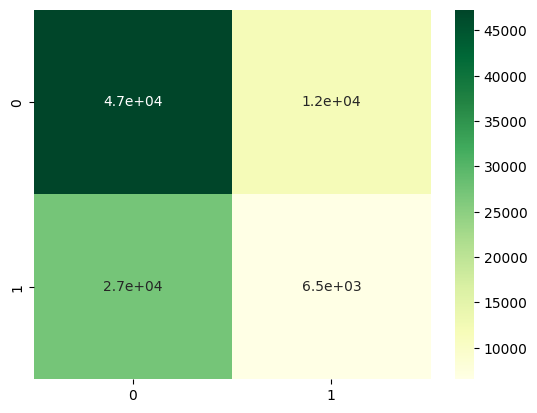

In [37]:
#defining target and other variables
X = df[['country_encoded','category_encoded']]
y = df['state']

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Train model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", recall_score(y_test, y_pred, average='weighted').round(2))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

## Using Continious Variable goal

Accuracy: 0.62
Recall: 0.62
--------------------------------------------------


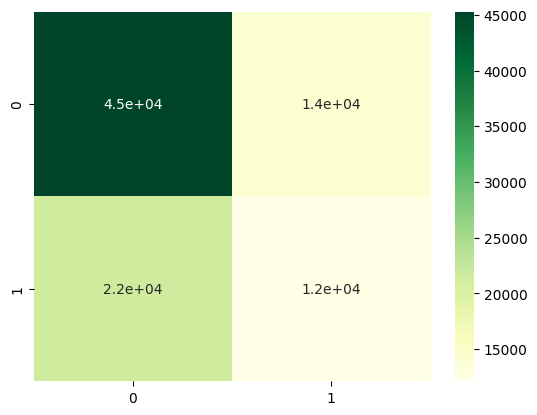

In [38]:
#defining target and other variables
X = df[['goal']]
y = df['state']

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Train model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", recall_score(y_test, y_pred, average='weighted').round(2))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

## Mixing it together

Accuracy: 0.63
Recall: 0.63
--------------------------------------------------


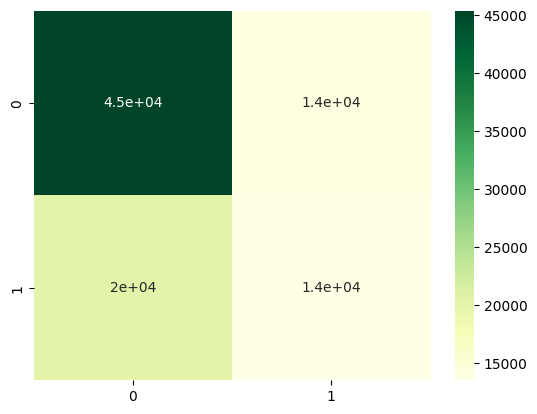

In [41]:
#defining target and other variables
X = df[['goal','country_encoded','duration','category_encoded']]
y = df['state']

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Train model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)
s
# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", recall_score(y_test, y_pred, average='weighted').round(2))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');